<a href="https://colab.research.google.com/github/svenzer007/Logistic_regression/blob/main/ex2_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def plot(X,Y):
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.show()


def mapFeature(X):
  for i in range(2,7):
    for j in range(i+1):
      a = (X[:,0]**(i-j))*(X[:,1]**(j))
      a = a.reshape((a.shape[0],1))
      #print(a.shape)
      X = np.hstack((X,a))
      #print(X.shape)
  return X   

def sigmoid(theta,X):
  z = -1*np.matmul(X,theta)
  z = 1 + np.exp(z)
  z = 1/z
  return z
  
def ComputeCost(X,Y,theta,lamb):
  m = X.shape[0]
  cost = (-1./m)*((np.matmul(np.log(np.transpose(sigmoid(theta,X))),Y))+(np.matmul(np.log(1-np.transpose(sigmoid(theta,X))),1-Y))) + (lamb/(2.*m))*(np.matmul(np.transpose(theta),theta))
  return cost

def ComputeGradient(X,Y,theta,lamb):
  m = X.shape[0]
  z = sigmoid(theta,X)
  #print(z.shape)
  grad = (1/m)*(np.matmul(np.transpose(X),((z)-Y))) + (lamb/(1.*m))*(theta)
  grad[0,0] = grad[0,0] - (lamb/(1.*m))*(theta[0,0]) 
  return grad


def lr_model(X,Y,theta,learning_rate,lamb,iterations=20000000):
  cost = []
  for i in range(iterations):
    cost.append(ComputeCost(X,Y,theta,lamb))
    grad = ComputeGradient(X,Y,theta,lamb)
    theta = theta - learning_rate*(grad)
  return cost, theta

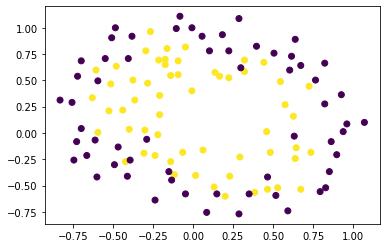

(117, 2)


In [8]:
data = pd.read_csv('/content/sample_data/ex2data2.txt')
data = data.to_numpy()
X = data[:,0:2]
Y = data[:,2].reshape((data.shape[0],1))
X = X.astype('float64')
Y = Y.astype('float64')
plot(X,Y)
print(X.shape)

In [9]:
X = mapFeature(X)
X = np.hstack((np.ones((X.shape[0],1)),X))


[[ 1.25723439]
 [ 0.61810891]
 [ 1.15137353]
 [-1.99065519]
 [-0.92093508]
 [-1.44690843]
 [ 0.12713751]
 [-0.34341668]
 [-0.36099904]
 [-0.17939285]
 [-1.4540893 ]
 [-0.04725557]
 [-0.6027436 ]
 [-0.27702681]
 [-1.18792978]
 [-0.24238378]
 [-0.19951221]
 [-0.04327395]
 [-0.26794662]
 [-0.29785897]
 [-0.44414557]
 [-1.04439867]
 [ 0.02966846]
 [-0.28945159]
 [ 0.01699879]
 [-0.32077951]
 [-0.14560797]
 [-0.9082429 ]]


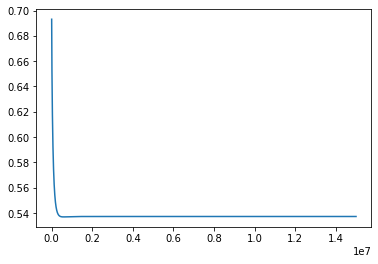

In [10]:
n = X.shape[1]
theta = np.zeros((n,1))
#print(theta.shape)
cost,theta = lr_model(X,Y,theta,learning_rate=0.00035,lamb=1.)
print(theta)
cost = np.array(cost).reshape(np.array(cost).shape[0])
plt.plot(np.linspace(0,14999999,15000000),(cost[0:15000000]))
plt.show()